In [1]:
import os
import sys
sys.path.append('../transformers/src/')
sys.path.append('../embeddings/')


from matplotlib import pyplot as plt
from library import GraphLib, Graph
from utils import print_util as pu

import json

In [2]:
#Model_dicts

models = {'fnet_mini': {'l':4,'o':['l','l','l','l'],'h':[256,256,256,256],'n':[4,4,4,4],'f':[[1024],[1024],[1024],[1024]],'p':['dft','dft','dft','dft']},
'fnet_tiny' : { 'l': 2, 'o': ['l']*2, 'h': [128]*2, 'n': [2]*2, 'f': [[4*128]]*2, 'p': ['dft']*2},
'fnet_2_256' : { 'l': 2, 'o': ['l']*2, 'h': [256]*2, 'n': [4]*2, 'f': [[4*256]]*2, 'p': ['dft']*2},
'fnet_4_128' : { 'l': 4, 'o': ['l']*4, 'h': [128]*4, 'n': [2]*4, 'f': [[4*128]]*4, 'p': ['dft']*4},
'bert_mini' : {'l': 4, 'o': ['sa']*4, 'h': [256]*4, 'n': [4]*4, 'f': [[1024]]*4, 'p': ['sdp']*4},
'bert_tiny' : { 'l': 2, 'o': ['sa']*2, 'h': [128]*2, 'n': [2]*2, 'f': [[4*128]]*2, 'p': ['sdp']*2},
'bert_2_256' : { 'l': 2, 'o': ['sa']*2, 'h': [256]*2, 'n': [4]*2, 'f': [[4*256]]*2, 'p': ['sdp']*2},
'bert_4_128' : { 'l': 4, 'o': ['sa']*4, 'h': [128]*4, 'n': [2]*4, 'f': [[4*128]]*4, 'p': ['sdp']*4},
'convbert_mini' : {'l':4,'o':['c','c','c','c'],'h':[256,256,256,256],'n':[4,4,4,4],'f':[[1024],[1024],[1024],[1024]],'p':[9,9,9,9]},
'convbert_tiny' : { 'l': 2, 'o': ['c']*2, 'h': [128]*2, 'n': [2]*2, 'f': [[4*128]]*2, 'p': [9]*2},
'convbert_2_256' : { 'l': 2, 'o': ['c']*2, 'h': [256]*2, 'n': [4]*2, 'f': [[4*256]]*2, 'p': [9]*2},
'convbert_4_128' : { 'l': 4, 'o': ['c']*4, 'h': [128]*4, 'n': [2]*4, 'f': [[4*128]]*4, 'p': [9]*4}
         }




In [3]:
dataset_file = '../dataset/dataset_test.json' 
graphLib = GraphLib.load_from_dataset(dataset_file)

def return_hash(graphlib,model_dict):
    
    graph = graphlib.get_graph(model_dict=model_dict)[0]
    
    return graph.hash

In [4]:
for name, model_dict in models.items():
    
    print(name+':'+return_hash(graphLib,model_dict))

fnet_mini:667418ff081be6ff86e898a0c5dec96457e7264ce314e1a226f22c51dd21dbae
fnet_tiny:cbc603dfb319416008d8c15e9dc3b355a272b74cd5b56c432a7d0fce9a2637a7
fnet_2_256:41644f3f93ae965f2e891bea01ed611e080299343049d23b7efa6484b128c24f
fnet_4_128:6a81017bf439b2ef7659019da6575bf10b74dbc95f140a66c99d42eefd7937d3
bert_mini:9386ba22dab898c13dc5b40ddd89532abfbafffa8b1638be5550dfa1e9777bd7
bert_tiny:79cadebed0d9211f265df75c88666c35c7b3b2e3823206c928f099d3a0faa444
bert_2_256:3043ce7b59479c89e76f539190b109ab368df128910ad7415bb232e44f975392
bert_4_128:b1374f05856d942d85529336a8a9a8eedb708ca426763e54003a63569fdf03c6
convbert_mini:0c724bfcbe0addd9a3e9301634449766d375460bd6acae743d395cbcfd329940
convbert_tiny:fee2c29c9b28f05573277ddd869081a9db1811e416bb1bda16cd17b9a600f269
convbert_2_256:28238734a3aa6074a4ec91d37cf37d9ebe3f5e9e698a35ac9ba0bfb2428ddb0d
convbert_4_128:b46be1430ef57d9e765168c8cadac2e940c5b4ad8bca9e094c7d1a31c3069a1a


In [5]:
def plot_train_loss(model_name, checkpoint_num):
    
    
    graph_hash = return_hash(graphLib,models[model_name])
    log_file = "../models/pretrained/"+str(graph_hash)+'/checkpoint-'+str(checkpoint_num)+'/trainer_state.json'
    f = open(log_file,)
    train_dict = json.load(f)
    epoch_log = []
    train_loss_log = []
    
    #print(train_dict[ "log_history"])
    
    
    for log in train_dict[ "log_history"]:  
        
        if 'loss' in log.keys():
            epoch_log.append(log['epoch'])
            train_loss_log.append(log['loss'])
        
    plt.figure()
    plt.plot(epoch_log,train_loss_log,'r')
    plt.xlabel('Epochs',fontsize=18)
    plt.ylabel('Training Loss', fontsize=18)
    plt.title(f'Pretraining for {model_name}',fontsize=20)
    
   
    
    
    
    

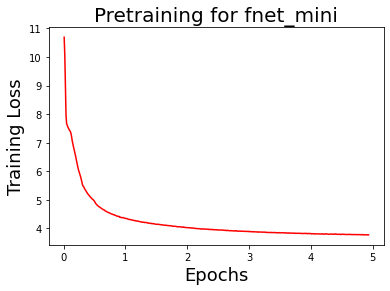

In [6]:
plot_train_loss('fnet_mini',242500)

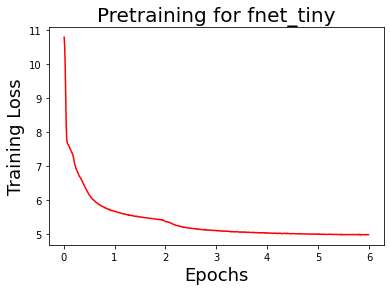

In [7]:
plot_train_loss('fnet_tiny',295000)

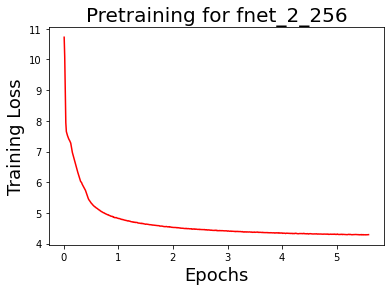

In [8]:
plot_train_loss('fnet_2_256',274500)

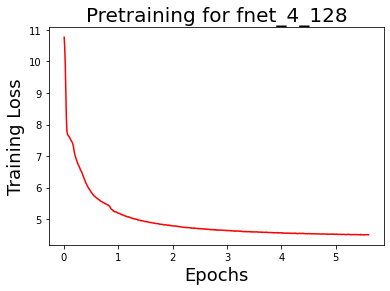

In [9]:
plot_train_loss('fnet_4_128',275500)

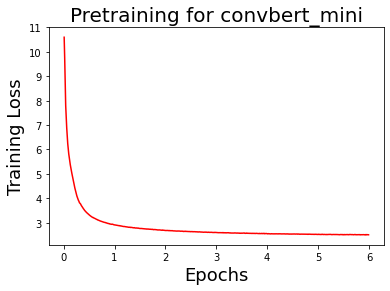

In [10]:
plot_train_loss('convbert_mini',295000)

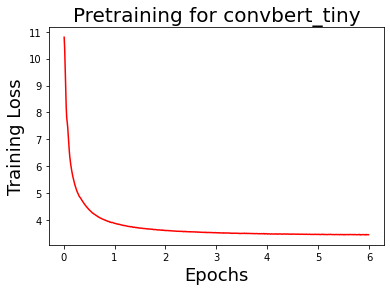

In [11]:
plot_train_loss('convbert_tiny',295000)

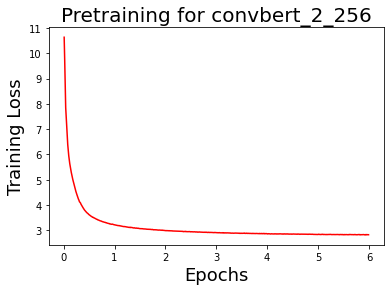

In [12]:
plot_train_loss('convbert_2_256',295000)

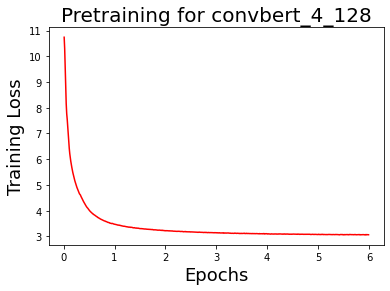

In [13]:
plot_train_loss('convbert_4_128',295000)